<a href="https://colab.research.google.com/github/Adarsh25449/Accident/blob/main/Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#READING AND DISPLAYING DATA
# importing
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [ ]:
#Training dataset
df=pd.read_csv(r'/content/Training.csv')
df

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0                 0   
1             0       0           0             0        0                 0   
2             0       0           0             0        0                 0   
3             0       0           0             0        0                 0   
4             0       0           0             0        0                 0   
...         ...     ...         ...           ...      ...               ...   
4915          0       0           0             0        0                 0   
4916          0       0           0             0        0                 0   
4917          0       0           0             0        0                 0   
4918          0       0           1             0        0                 0   
4919          0       0           0             0        0                 0   

      muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
0                  0         0                    0                    0   
1                  0         0                    0                    0   
2                  0         0                    0                    0   
3                  0         0                    0                    0   
4                  0         0                    0                    0   
...              ...       ...                  ...                  ...   
4915               0         1                    0                    0   
4916               0         0                    0                    0   
4917               0         0                    1                    0   
4918               0         0                    0                    0   
4919               0         0                    0                    0   

      fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
0           0            0        0                     0            0   
1           0            0        0                     0            0   
2           0            0        0                     0            0   
3           0            0        0                     0            0   
4           0            0        0                     0            0   
...       ...          ...      ...                   ...          ...   
4915        0            0        0                     0            0   
4916        0            0        0                     0            0   
4917        0            0        0                     0            0   
4918        0            0        0                     0            0   
4919        0            0        0                     0            0   

      weight_loss  restlessness  lethargy  patches_in_throat  \
0               0             0         0                  0   
1               0             0         0                  0   
2               0             0         0                  0   
3               0             0         0                  0   
4               0             0         0                  0   
...   

In [ ]:
#Teasting Dataset
te=pd.read_csv(r'/content/Testing.csv')
te

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0         1          1                     1                    0          0   
1         0          0                     0                    1          1   
2         0          0                     0                    0          0   
3         1          0                     0                    0          0   
4         1          1                     0                    0          0   
5         0          0                     0                    0          0   
6         0          0                     0                    0          0   
7         0          0                     0                    0          0   
8         0          0                     0                    0          0   
9         0          0                     0                    0          0   
10        0          0                     0                    0          0   
11        0          0                     0                    0          0   
12        0          0                     0                    0          0   
13        0          0                     0                    0          0   
14        1          0                     0                    0          0   
15        0          0                     0                    0          0   
16        1          1                     0                    0          0   
17        0          1                     0                    0          0   
18        0          0                     0                    0          0   
19        0          0                     0                    0          0   
20        1          0                     0                    0          0   
21        0          0                     0                    0          0   
22        0          0                     0                    0          0   
23        0          0                     0                    0          0   
24        0          0                     0                    0          0   
25        0          0                     0                    0          0   
26        0          0                     0                    1          0   
27        0          0                     0                    0          0   
28        0          0                     0                    0          0   
29        0          0                     0                    0          0   
30        0          0                     0                    0          0   
31        0          0                     0                    0          0   
32        0          0                     0                    0          0   
33        0          0                     0                    0          0   
34        0          0                     0                    0          0   
35        0          0                     0                    0          0   
36        0          0                     0                    0          0   
37        0          1                     0                    0          0   
38        0          0                     0                    0          0   
39        0          1                     0                    0          0   
40        0          1                     0                    0          0   
41        1          1                     0                    0          0   

    chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0        0           0             0        0                 0   
1        1           0             0        0                 0   
2        0           0             1        1                 1   
3        0           0             0        0                 0   
4        0           0             1        0                 0   
5        0           0             0        0                 0   
6        0           0             0        0                 0   
7        0           0     

In [ ]:
#DATA PREPROCESSING AND VISUALIZATION
# importing
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Dropping the 134th column which is unwanted
df = df.drop(df.columns[133], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


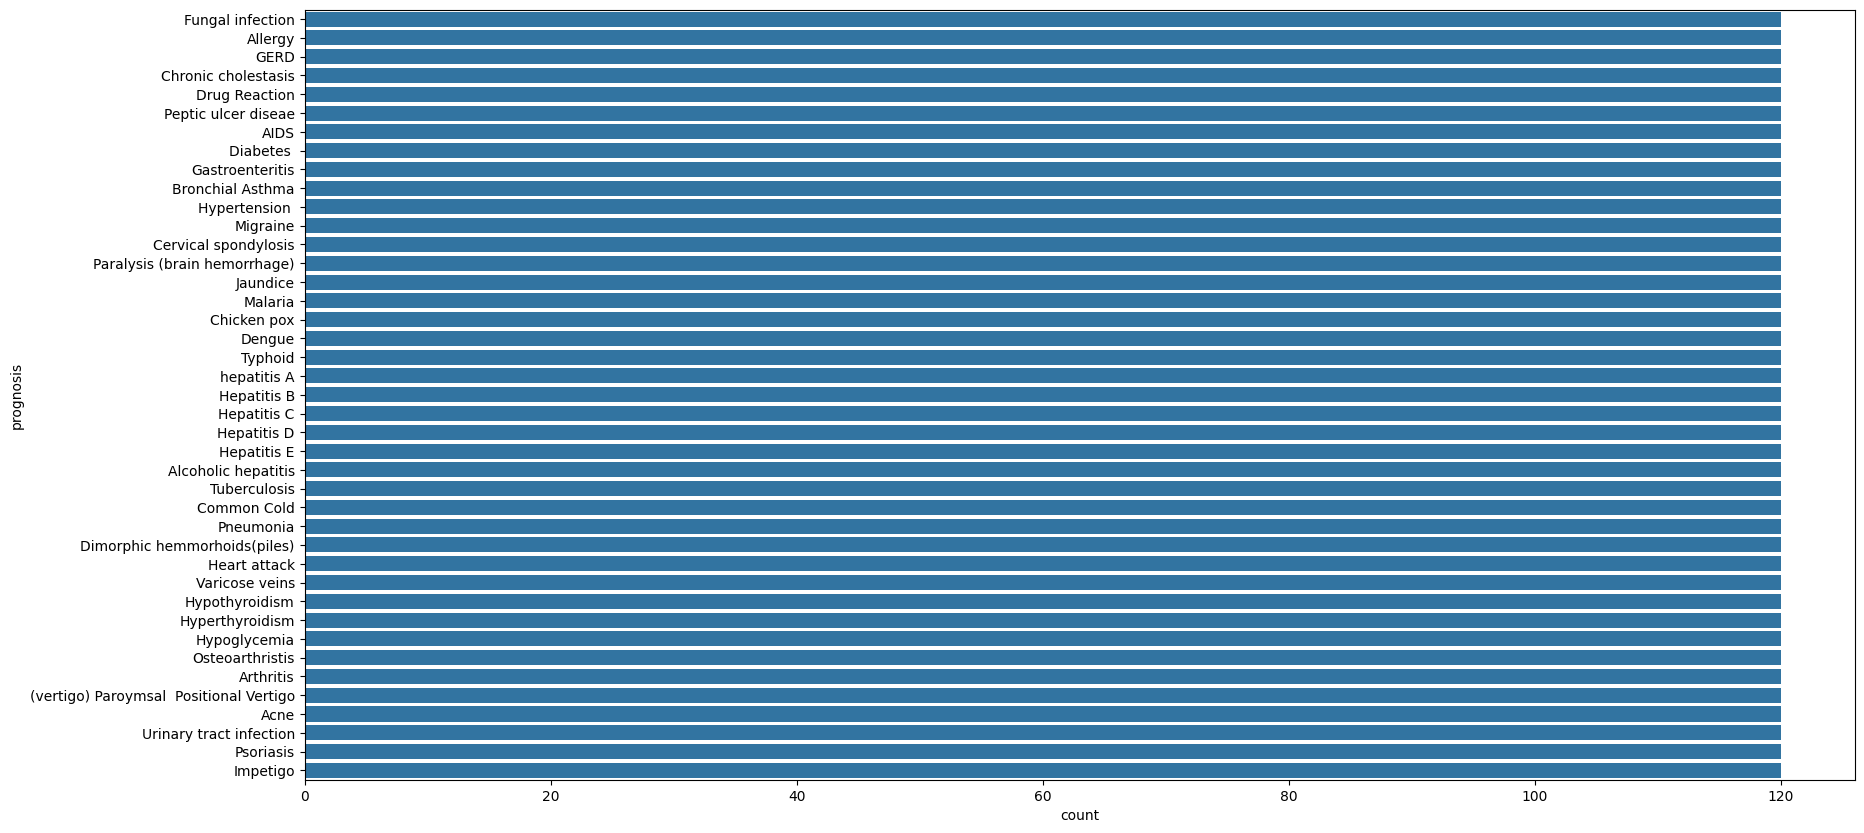

In [ ]:
# Checking if our target vaiable is balanced
plt.figure(figsize=(20,10))
sns.countplot(data=df,y='prognosis')
plt.show()

In [ ]:
# Perfectly balanced ðŸ¤Œ
# Let us check if there are any null values
[col for col in df.columns if df[col].isnull().any()]

[]

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [ ]:
# No null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [ ]:
#TESTING SET
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


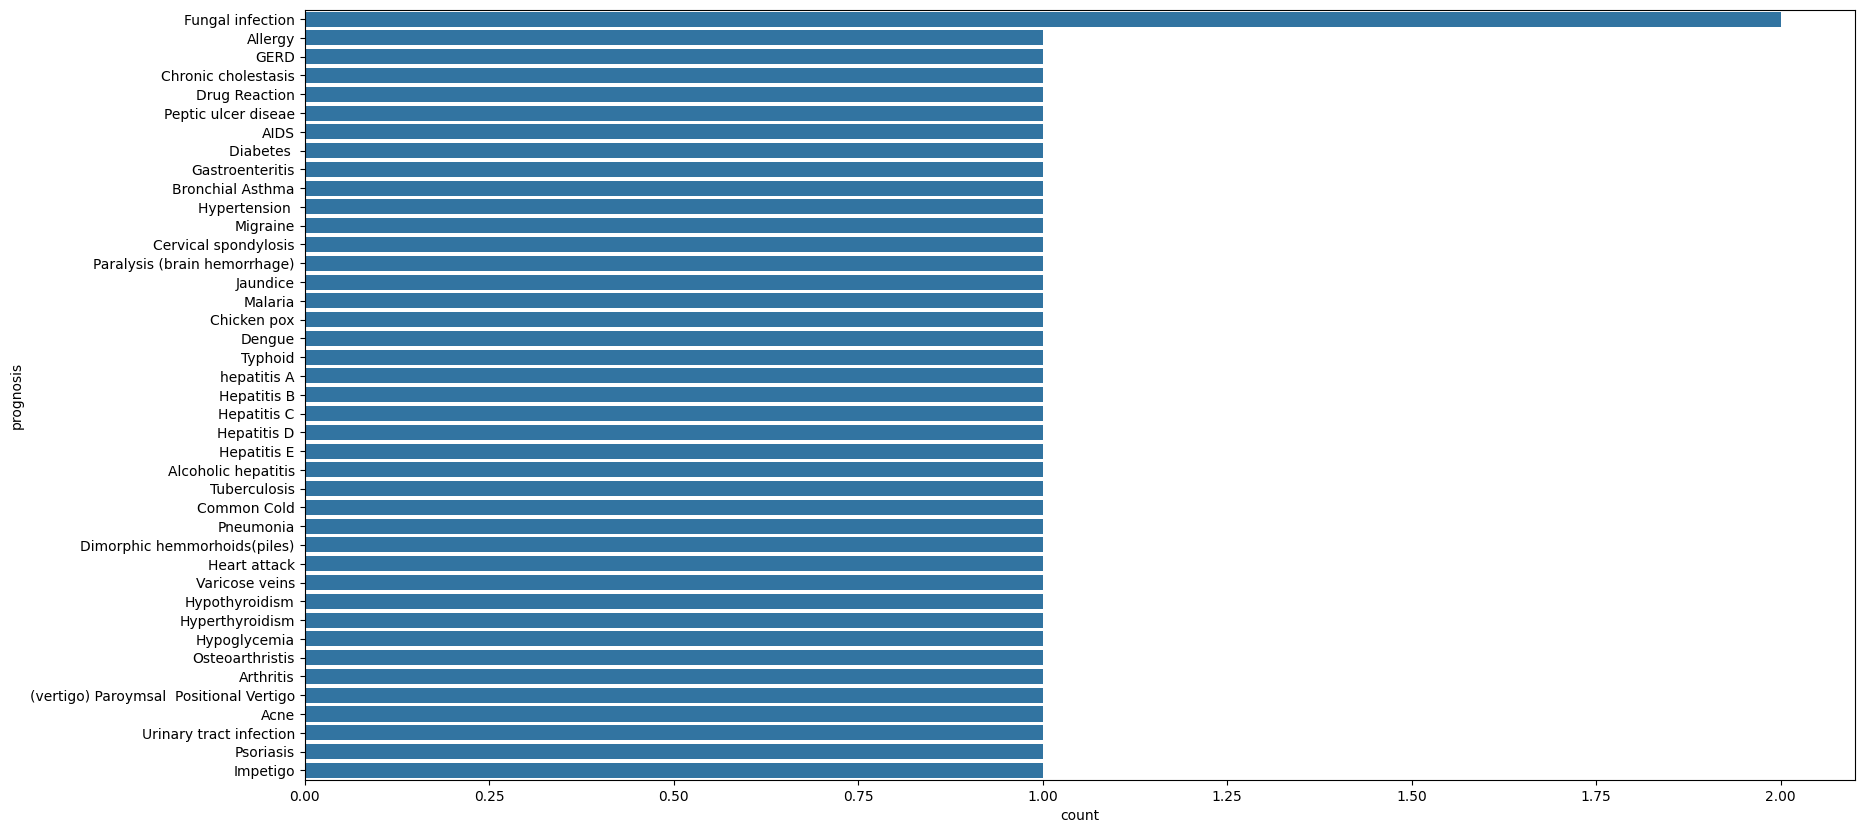

In [ ]:
# Checking if our target vaiable is balanced
plt.figure(figsize=(20,10))
sns.countplot(data=te,y='prognosis')
plt.show()

In [ ]:
#DATA PREPARATION
#TRAINING SET
tdf=df.copy()
x=df.drop(columns='prognosis')
y=df['prognosis']

In [ ]:
#TESTING SET
tte=te.copy()
x_te=te.drop(columns='prognosis')
y_te=te['prognosis']

In [ ]:
print(x.shape,y.shape,x_te.shape,y_te.shape)

(4920, 132) (4920,) (42, 132) (42,)


In [ ]:
#MODEL
# importing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,roc_curve, auc,roc_auc_score

In [ ]:
at=[]
a=[]
pt=[]
p=[]
rt=[]
r=[]
f1t=[]
f1=[]
crt=[]
cr=[]
cmt=[]
cm=[]
roc_auc_t=[]
roc_auc=[]

In [ ]:
rf=RandomForestClassifier()
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,31)),'min_samples_leaf':list(np.arange(2,51)),
       'n_estimators':[10]}
nrf=RandomizedSearchCV(rf,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy',random_state=20)
nrf.fit(x,y)
print(nrf.best_params_)
print(nrf.best_score_)
nrf=nrf.best_estimator_

{'n_estimators': 10, 'min_samples_split': np.int64(9), 'min_samples_leaf': np.int64(2), 'criterion': 'entropy'}
1.0


In [ ]:
predt=nrf.predict(x)
pred=nrf.predict(x_te)

In [ ]:
at.append(accuracy_score(y,predt))
a.append(accuracy_score(y_te,pred))
pt.append(precision_score(y, predt, average="weighted"))
p.append(precision_score(y_te, pred, average="weighted"))
rt.append(recall_score(y, predt, average="weighted"))
r.append(recall_score(y_te, pred, average="weighted"))
f1t.append(f1_score(y, predt, average="weighted"))
f1.append(f1_score(y_te, pred, average="weighted"))
crt.append(classification_report(y,predt))
cr.append(classification_report(y_te,pred))
cmt.append(confusion_matrix(y,predt))
cm.append(confusion_matrix(y_te,pred))

In [ ]:
#PCA
# importing
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
#TRAINING
ttdf=tdf.copy()
tdf_numeric = tdf.select_dtypes(include=[np.number])
tdf_numeric = tdf_numeric.fillna(tdf_numeric.mean())
scaler = StandardScaler()
tdf_scaled = scaler.fit_transform(tdf_numeric)

In [ ]:
pca = PCA(n_components=65)
tdf_pca = pca.fit_transform(tdf_scaled)
tdf_pca = pd.DataFrame(tdf_pca, columns=[f'PC{i+1}' for i in range(65)])
print("Original shape:", tdf_numeric.shape)
print("Reduced shape:", tdf_pca.shape)


print("Explained Variance Ratio (first 10 PCs):", pca.explained_variance_ratio_[:10])
print("Total variance retained:", np.sum(pca.explained_variance_ratio_))


Original shape: (4920, 132)
Reduced shape: (4920, 65)
Explained Variance Ratio (first 10 PCs): [0.07350362 0.06640265 0.05207505 0.04829505 0.04327994 0.03763081
 0.03638701 0.03536861 0.03400703 0.03300662]
Total variance retained: 0.9808579231197446


In [ ]:
tdf=tdf_pca.copy() # New training dataframe

In [ ]:
#TESTING DATA
x_te = x_te.fillna(x_te.mean())
x_te_scaled = scaler.transform(x_te)
x_te_pca = pca.transform(x_te_scaled)
x_te_pca = pd.DataFrame(x_te_pca, columns=[f'PC{i+1}' for i in range(65)])

print("Original test shape:", x_te.shape)
print("Reduced test shape:", x_te_pca.shape)

Original test shape: (42, 132)
Reduced test shape: (42, 65)


In [ ]:
tx_te=x_te_pca.copy() # New testing Dataframe


In [ ]:
#DATA PREPARATION (AFTER PCA)
x=tdf
y=ttdf['prognosis']

In [ ]:
print(x.shape,y.shape,tx_te.shape,y_te.shape)

(4920, 65) (4920,) (42, 65) (42,)


In [ ]:
#MODEL AFTER(PCA)
rf=RandomForestClassifier()
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,31)),'min_samples_leaf':list(np.arange(2,51)),
       'n_estimators':[10]}
nrf=RandomizedSearchCV(rf,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy',random_state=20)
nrf.fit(x,y)
print(nrf.best_params_)
print(nrf.best_score_)
nrf=nrf.best_estimator_

{'n_estimators': 10, 'min_samples_split': np.int64(30), 'min_samples_leaf': np.int64(39), 'criterion': 'entropy'}
1.0


In [ ]:
predt=nrf.predict(x)
pred=nrf.predict(tx_te)

In [ ]:
at.append(accuracy_score(y,predt))
a.append(accuracy_score(y_te,pred))
pt.append(precision_score(y, predt, average="weighted"))
p.append(precision_score(y_te, pred, average="weighted"))
rt.append(recall_score(y, predt, average="weighted"))
r.append(recall_score(y_te, pred, average="weighted"))
f1t.append(f1_score(y, predt, average="weighted"))
f1.append(f1_score(y_te, pred, average="weighted"))
crt.append(classification_report(y,predt))
cr.append(classification_report(y_te,pred))
cmt.append(confusion_matrix(y,predt))
cm.append(confusion_matrix(y_te,pred))

In [ ]:
#EVALUATION MATRIX
mods=['without_pca','with_pca']
for m, c in zip(mods,crt):
    print(m,'\n',c,'\n\n')

without_pca 
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00       120
                                   AIDS       1.00      1.00      1.00       120
                                   Acne       1.00      1.00      1.00       120
                    Alcoholic hepatitis       1.00      1.00      1.00       120
                                Allergy       1.00      1.00      1.00       120
                              Arthritis       1.00      1.00      1.00       120
                       Bronchial Asthma       1.00      1.00      1.00       120
                   Cervical spondylosis       1.00      1.00      1.00       120
                            Chicken pox       1.00      1.00      1.00       120
                    Chronic cholestasis       1.00      1.00      1.00       120
                            Common Cold       1.00      1.00      1.00       120
             

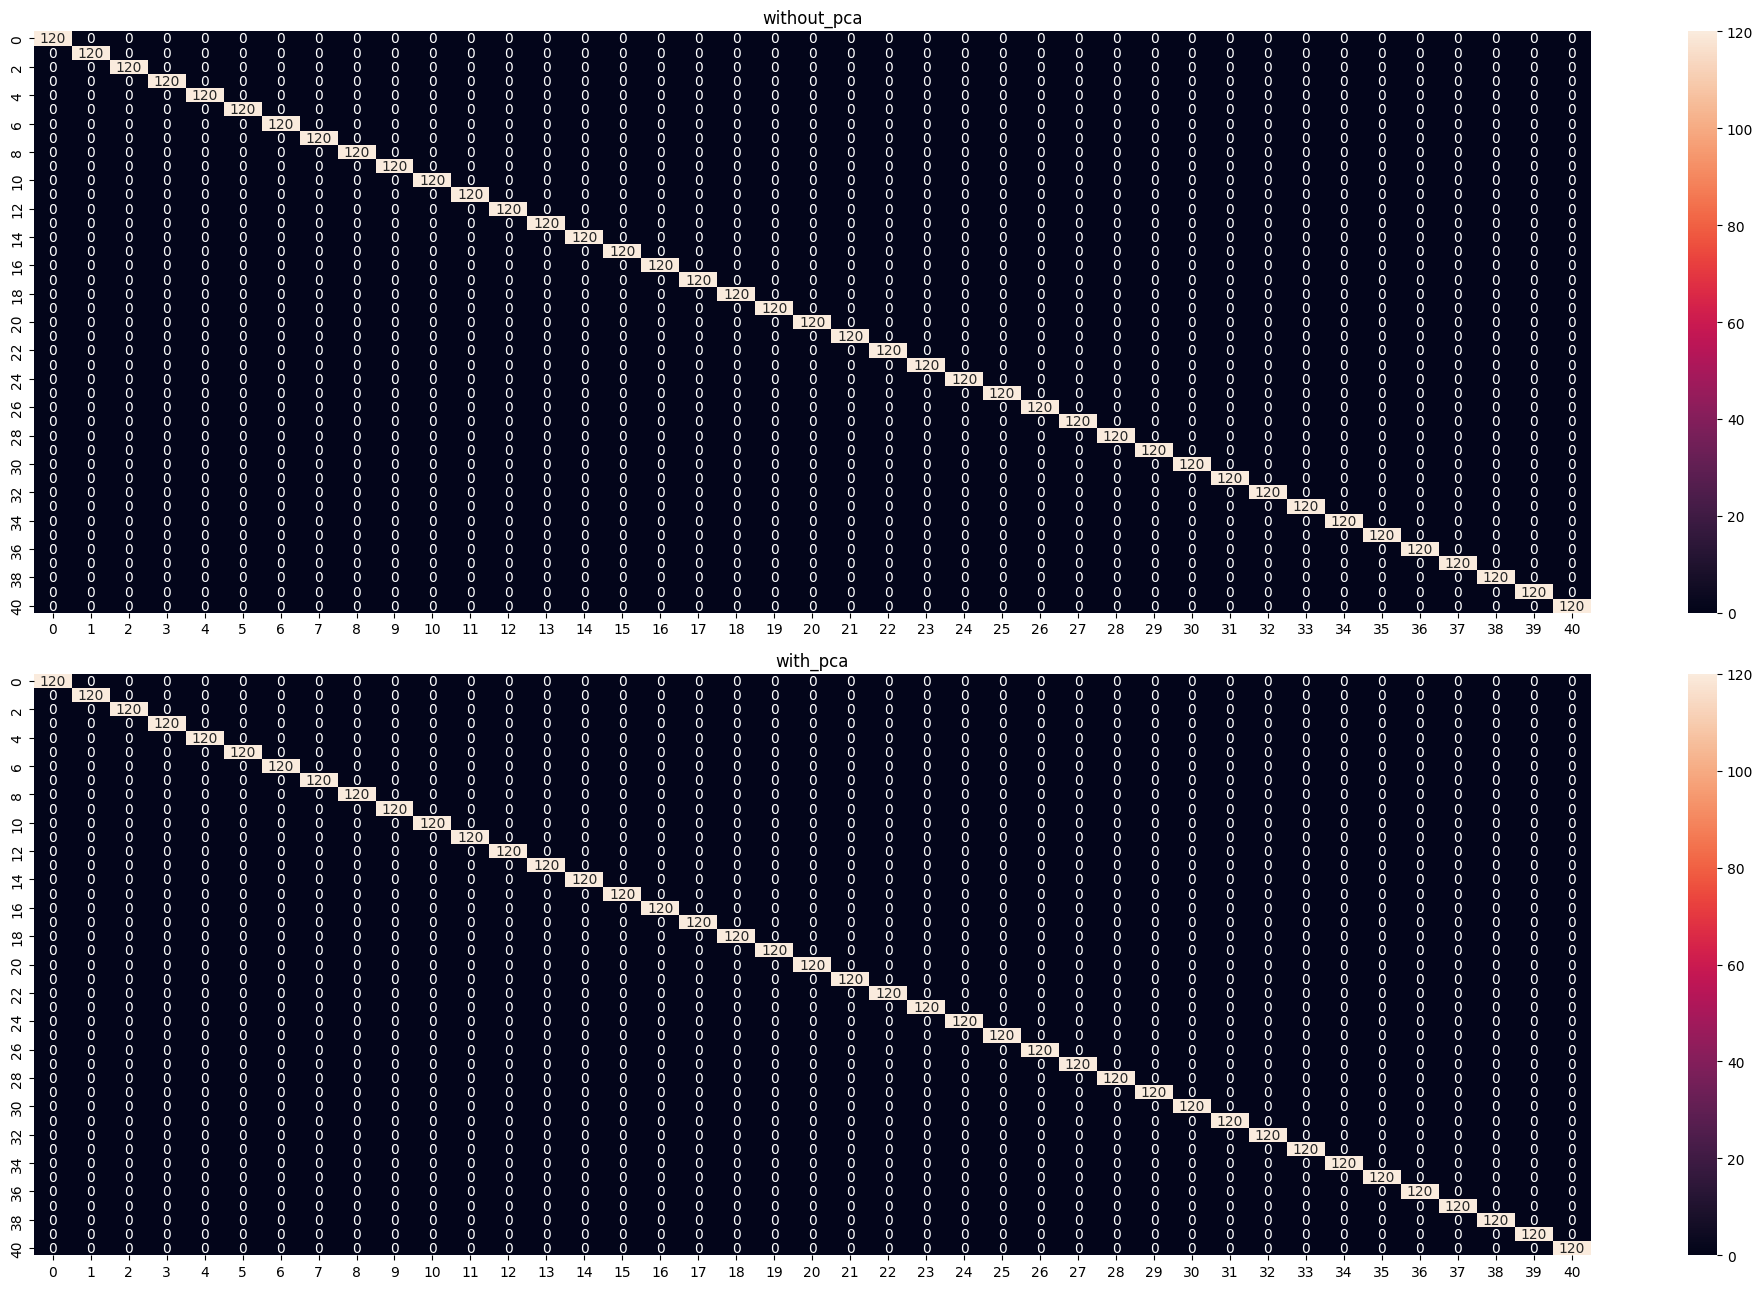

In [ ]:
#CONFUSION MATRIX
mods=['without_pca','with_pca']
fig,ax=plt.subplots(2,1,figsize=(20,13))
ax=ax.flatten()
i=0
for m,c in zip(mods,cmt):
    sns.heatmap(c,annot=True,ax=ax[i],fmt='d')
    ax[i].set_title(m)
    i+=1
plt.tight_layout()
plt.show()

In [ ]:
# ACCURACY, PRECISION , RECALL AND F1 SCORE
mods=['without_pca','with_pca']
tr=pd.DataFrame({'Models':mods,'Accuracy':at,'Precision':pt,'Recall':rt,'F1 Score':f1t})
tr.sort_values(by=['Accuracy','Precision','Recall','F1 Score'],ascending=False)

Models  Accuracy  Precision  Recall  F1 Score
0  without_pca       1.0        1.0     1.0       1.0
1     with_pca       1.0        1.0     1.0       1.0

In [ ]:
#TESTING
#CLASSIFICATION REPORT
mods=['without_pca','with_pca']
for m, c in zip(mods,cr):
    print(m,'\n',c,'\n\n')


without_pca 
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
             

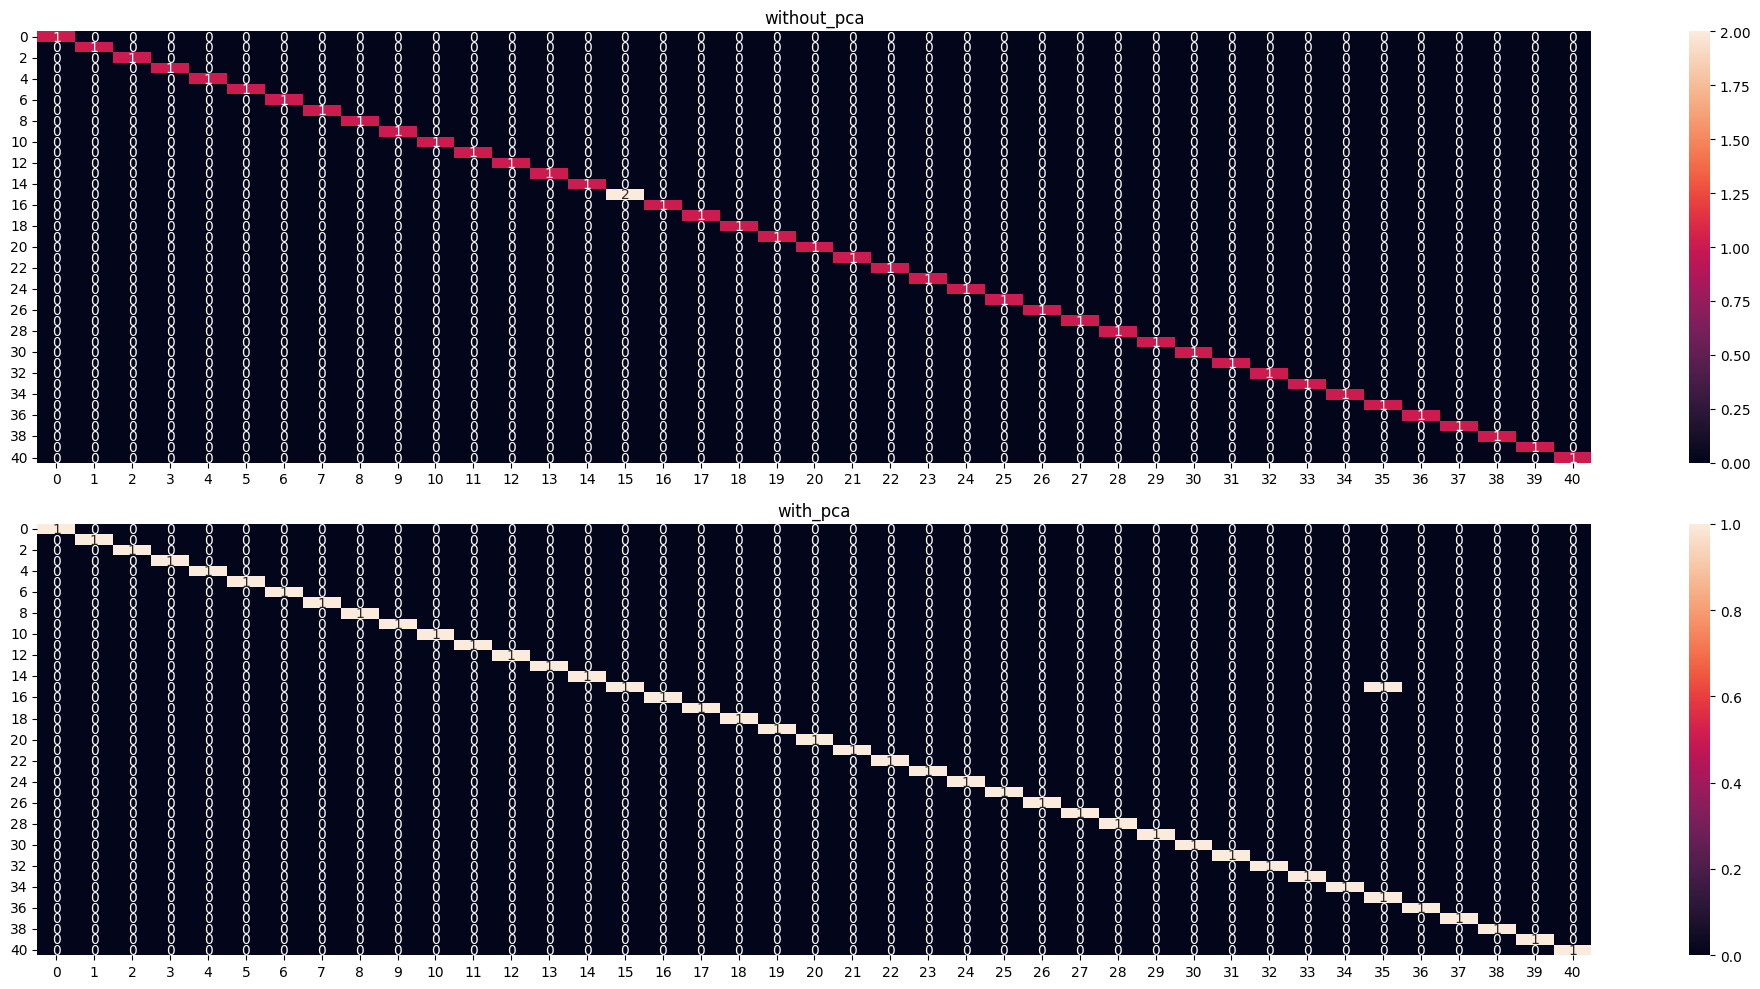

In [ ]:
#CONFUSION MATRIX
fig,ax=plt.subplots(2,1,figsize=(20,10))
ax=ax.flatten()
i=0
for m,c in zip(mods,cm):
    sns.heatmap(c,annot=True,ax=ax[i],fmt='d')
    ax[i].set_title(m)
    i+=1
plt.tight_layout()
plt.show()

In [ ]:
#ACCURACY, PRECISION , RECALL AND F1 SCORE
mods=['without_pca','with_pca']
te=pd.DataFrame({'Models':mods,'Accuracy':a,'Precision':p,'Recall':r,'F1 Score':f1})
te.sort_values(by=['Accuracy','Precision','Recall','F1 Score'],ascending=False)

Models  Accuracy  Precision   Recall  F1 Score
0  without_pca   1.00000   1.000000  1.00000   1.00000
1     with_pca   0.97619   0.988095  0.97619   0.97619

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Models').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Accuracy', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Recall', y='F1 Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Accuracy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Models')):
  _plot_series(series, series_name, i)
  fig.legend(title='Models', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Precision']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Models')):
  _plot_series(series, series_name, i)
  fig.legend(title='Models', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Precision')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Recall']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Models')):
  _plot_series(series, series_name, i)
  fig.legend(title='Models', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Recall')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['F1 Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Models')):
  _plot_series(series, series_name, i)
  fig.legend(title='Models', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('F1 Score')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Models'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='Models', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Models'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Accuracy', y='Models', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Models'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Precision', y='Models', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Models'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Recall', y='Models', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)